In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
# Load the TSV file, using header=None since there is no header row
df_train = pd.read_csv('ACSF1_TRAIN.tsv', sep='\t', header=None)
df_test = pd.read_csv('ACSF1_TEST.tsv', sep='\t', header=None)

In [3]:
#  Separate labels and data of train 
labels_train = df_train.iloc[:, 0].values        
data_train = df_train.iloc[:, 1:]     
print("train Labels shape:", labels_train.shape)
print("train Data shape: ", data_train.shape)

train Labels shape: (100,)
train Data shape:  (100, 1460)


In [4]:
#  Separate labels and data of test 
labels_test = df_test.iloc[:, 0].values        
data_test = df_test.iloc[:, 1:]     
print("test Labels shape:", labels_test.shape)
print("test Data shape: ", data_test.shape)

test Labels shape: (100,)
test Data shape:  (100, 1460)


In [5]:
#  Verify there are no missing values
print("\nAny missing values in the train dataset?", data_train.isnull().any().any())
print("\nAny missing values in the test dataset?", data_test.isnull().any().any())


Any missing values in the train dataset? False

Any missing values in the test dataset? False


In [6]:
print(data_train.head())
print(data_test.head())

       1         2         3         4         5         6         7     \
0 -0.584754 -0.584754  1.730991 -0.584754 -0.584754 -0.584754  1.729917   
1 -0.591434 -0.511104  1.726820 -0.580422 -0.591434 -0.511104  1.727921   
2 -0.577945 -0.577945  1.730793 -0.577945 -0.578946 -0.564882  1.731094   
3 -0.588925 -0.538088  1.735718 -0.588716 -0.589962 -0.523551  1.735619   
4 -0.596633 -0.532188  1.718067 -0.592117 -0.596633 -0.532188  1.715241   

       8         9         10    ...      1451      1452      1453      1454  \
0 -0.584754 -0.584754 -0.584754  ...  1.732726 -0.584734 -0.583729 -0.578603   
1 -0.580422 -0.591434 -0.511104  ...  1.727396 -0.580731 -0.580731 -0.580731   
2 -0.577829 -0.580956 -0.548788  ...  1.734727 -0.577751 -0.580956 -0.549798   
3 -0.588646 -0.588925 -0.524598  ...  1.743664 -0.588876 -0.586852 -0.576483   
4 -0.592117 -0.595605 -0.532188  ...  1.743258 -0.592403 -0.591524 -0.575158   

       1455      1456      1457      1458      1459      1460  
0  1

Plotting sample idx = 10


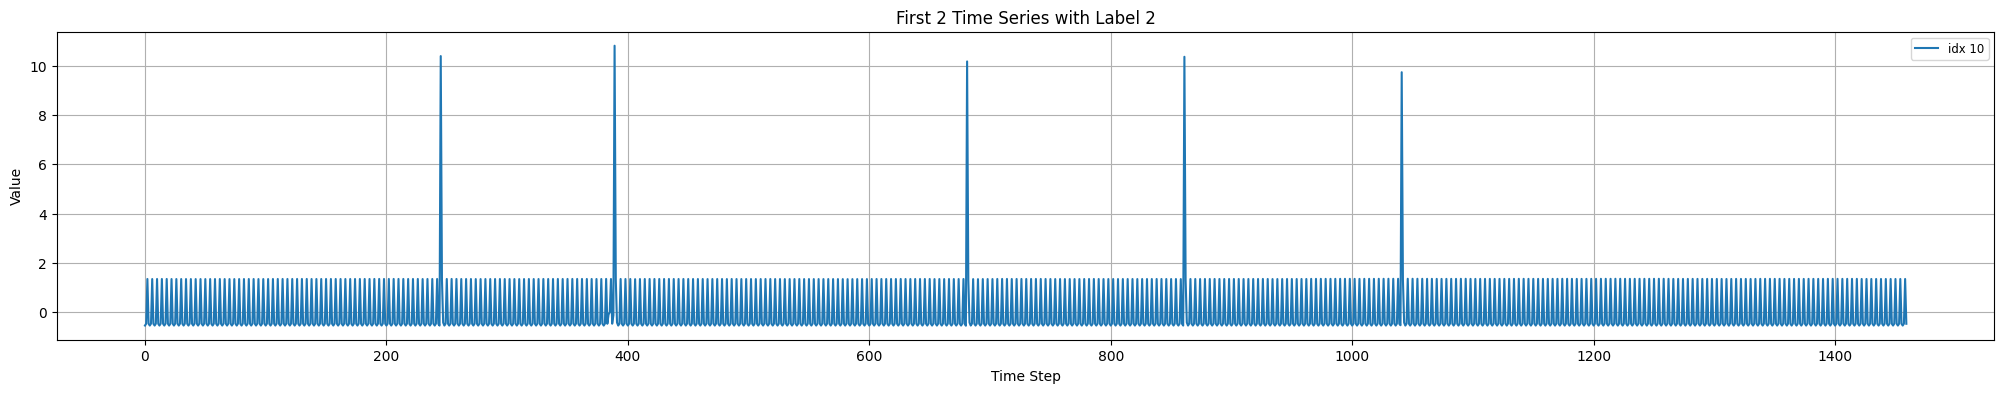

In [7]:
plt.figure(figsize=(25, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 3:
        print(f"Plotting sample idx = {i}")
        plt.plot(data_train.iloc[i].values,label=f"idx {i}")
        count += 1
        if count == 1:
            break
plt.title("First 2 Time Series with Label 2")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend(loc="upper right", fontsize="small")
plt.grid(True)
plt.show()

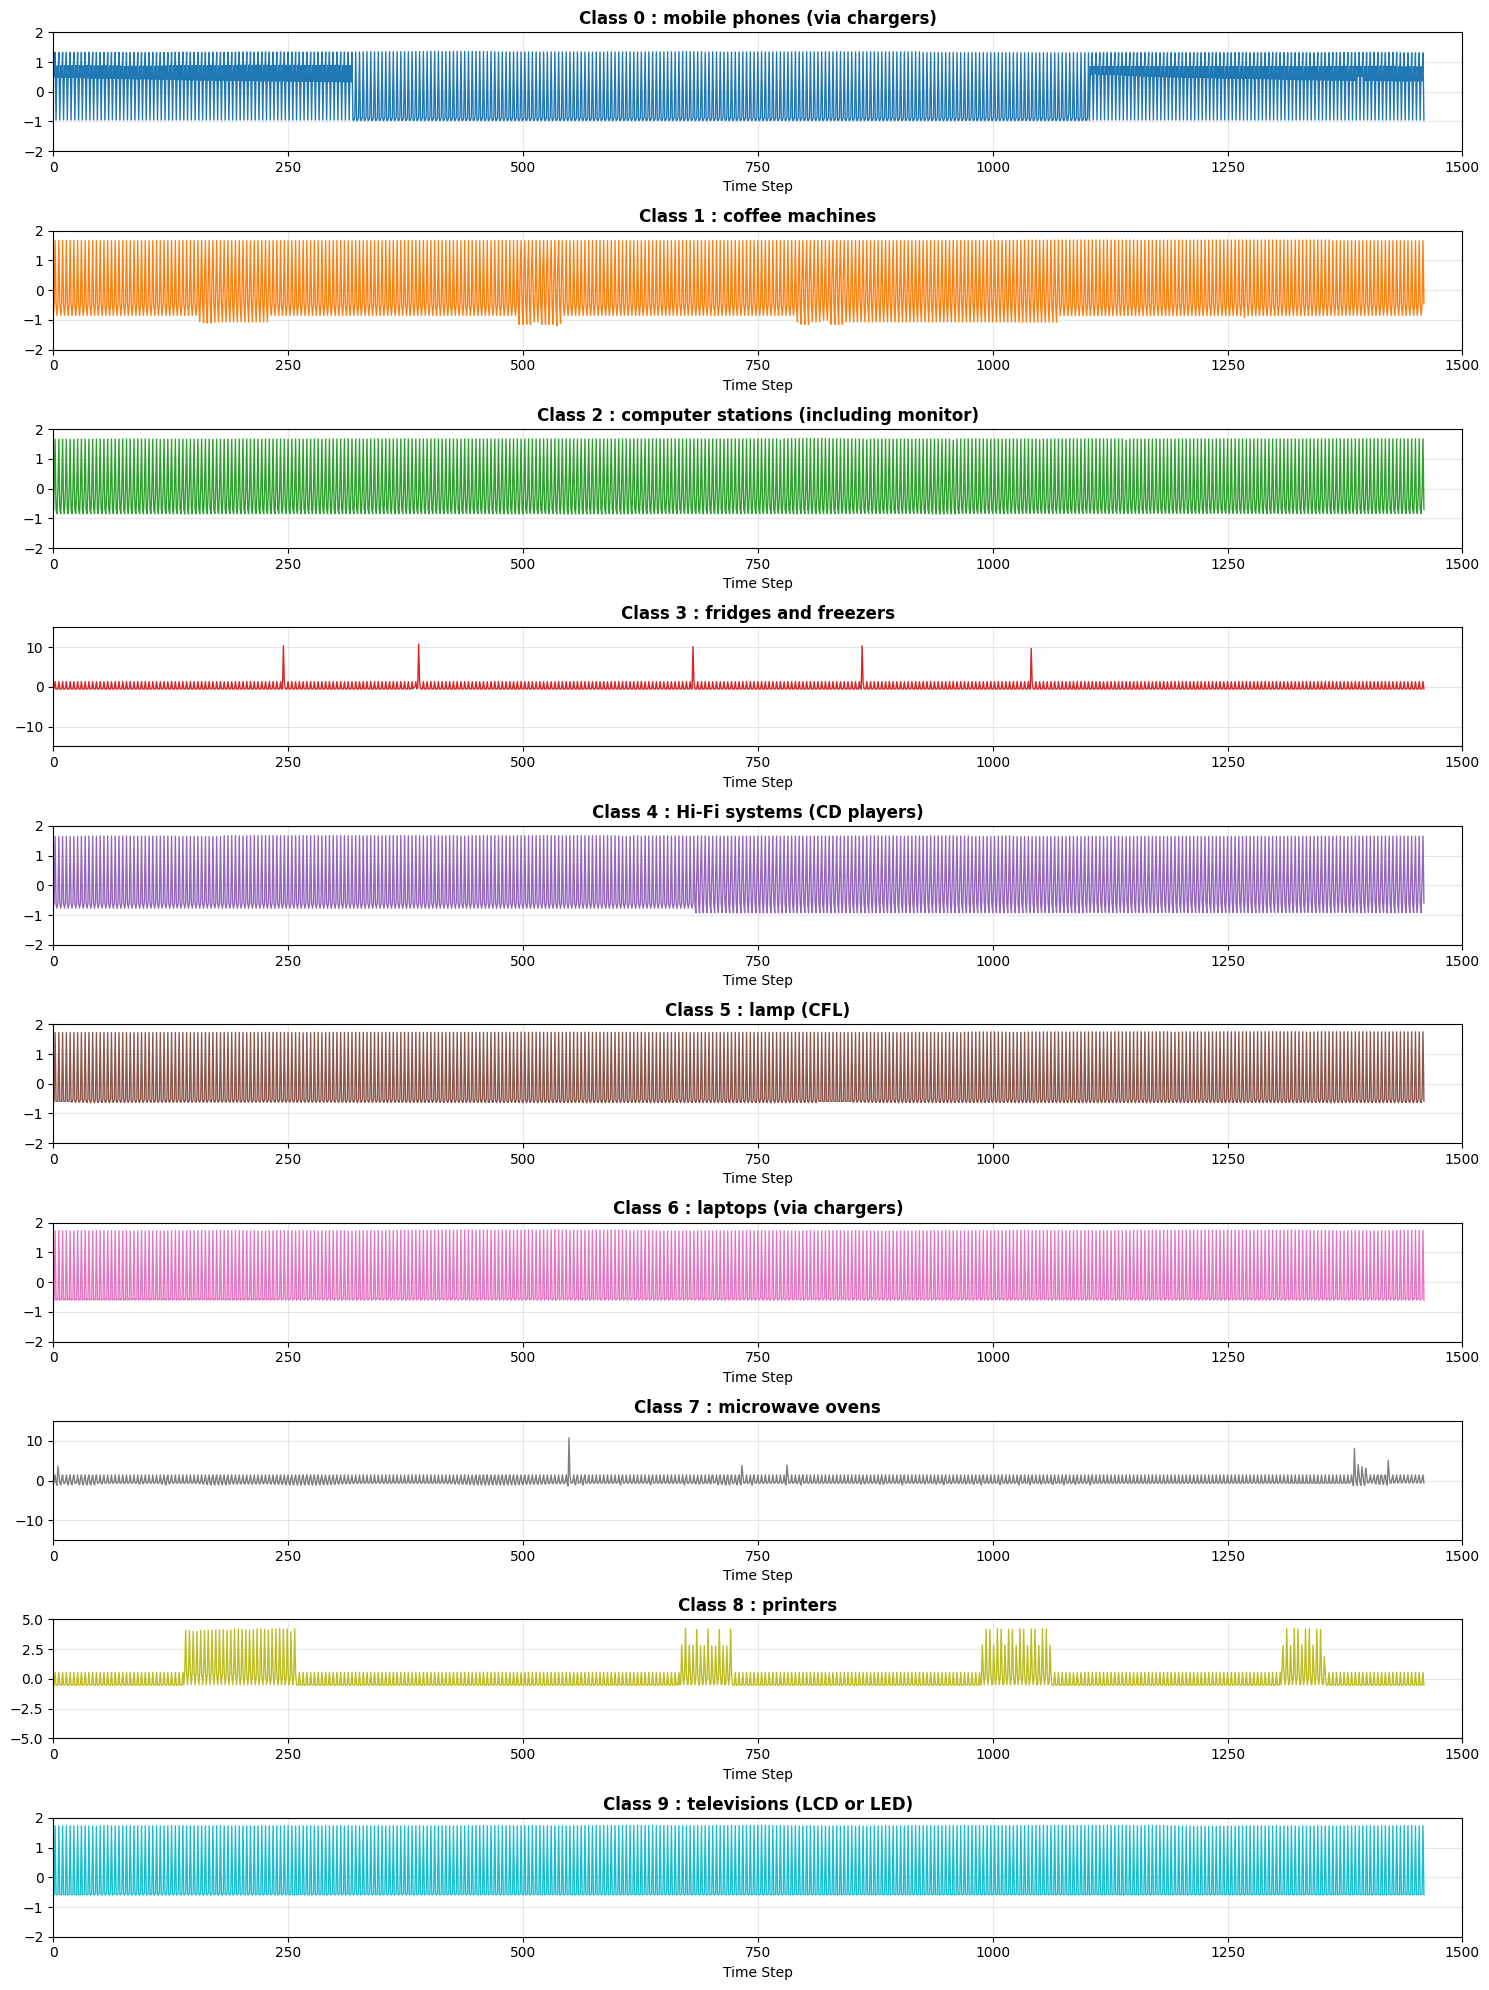

In [11]:
# Map numeric labels to human-readable names
class_names = {
    0: "mobile phones (via chargers)",
    1: "coffee machines",
    2: "computer stations (including monitor)",
    3: "fridges and freezers",
    4: "Hi-Fi systems (CD players)",
    5: "lamp (CFL)",
    6: "laptops (via chargers)",
    7: "microwave ovens",
    8: "printers",
    9: "televisions (LCD or LED)"
}

colors = plt.cm.tab10.colors
ticks = np.arange(0, 1501, 250)

fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=False)

for cls, ax in zip(range(10), axes):
    # find the first example of this class
    idxs = np.where(labels_train == cls)[0]
    if len(idxs) == 0:
        ax.set_visible(False)
        continue
    idx = idxs[0]
    series = data_train.iloc[idx].values

    # plot
    ax.plot(series, color=colors[cls], linewidth=1)

    # X-axis ticks and labels on every subplot
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_xlim(0, 1500)

    # Y-axis symmetric limit
    max_abs = max(abs(series.min()), abs(series.max()))
    if max_abs <= 5:
        y_lim = math.ceil(max_abs)
    else:
        y_lim = math.ceil(max_abs / 5) * 5
    ax.set_ylim(-y_lim, y_lim)

    # Title centered
    ax.set_title(f"Class {cls} : {class_names[cls]}", fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3)

# Add a shared X label underneath all subplots
for ax in axes:
    ax.set_xlabel("Time Step")

plt.tight_layout(h_pad=1.0)
plt.savefig("ACSF1_first_example_per_class.pdf", bbox_inches='tight')
plt.show()


C:\Users\kisha\AppData\Local\Temp\ipykernel_61944\2982888766.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


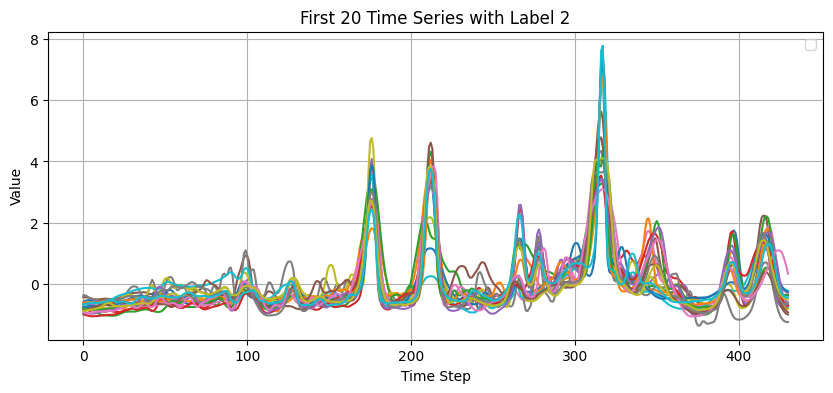

In [37]:
plt.figure(figsize=(10, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 2:
        plt.plot(data_train.iloc[i].values)
        count += 1
        if count == 20:
            break
plt.title("First 20 Time Series with Label 2")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()